In [1]:

import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import numpy as np
import os
import cv2                                
import tensorflow as tf                
from tqdm import tqdm
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets

from tensorflow import keras

import numpy as np




In [2]:
class_names = ['benign', 'malignant']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
    

In [3]:
def load_data():
   
    
    datasets = ['C:/Users/parit/Downloads/skin/train', 'C:/Users/parit/Downloads/skin/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  1%|▏         | 21/1440 [00:00<00:07, 199.65it/s]

Loading C:/Users/parit/Downloads/skin/train


 15%|█▍        | 53/360 [00:00<00:01, 267.76it/s]

Loading C:/Users/parit/Downloads/skin/test


100%|██████████| 300/300 [00:01<00:00, 246.57it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2637
Number of testing examples: 660
Each image is of size: (150, 150)


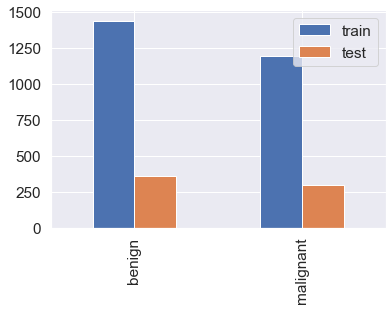

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

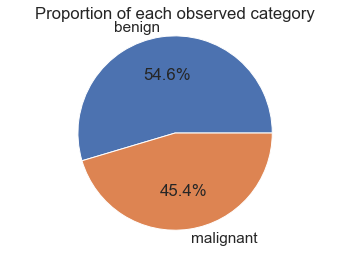

In [8]:
plt.pie(train_counts,
        explode=(0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

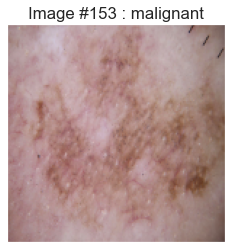

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

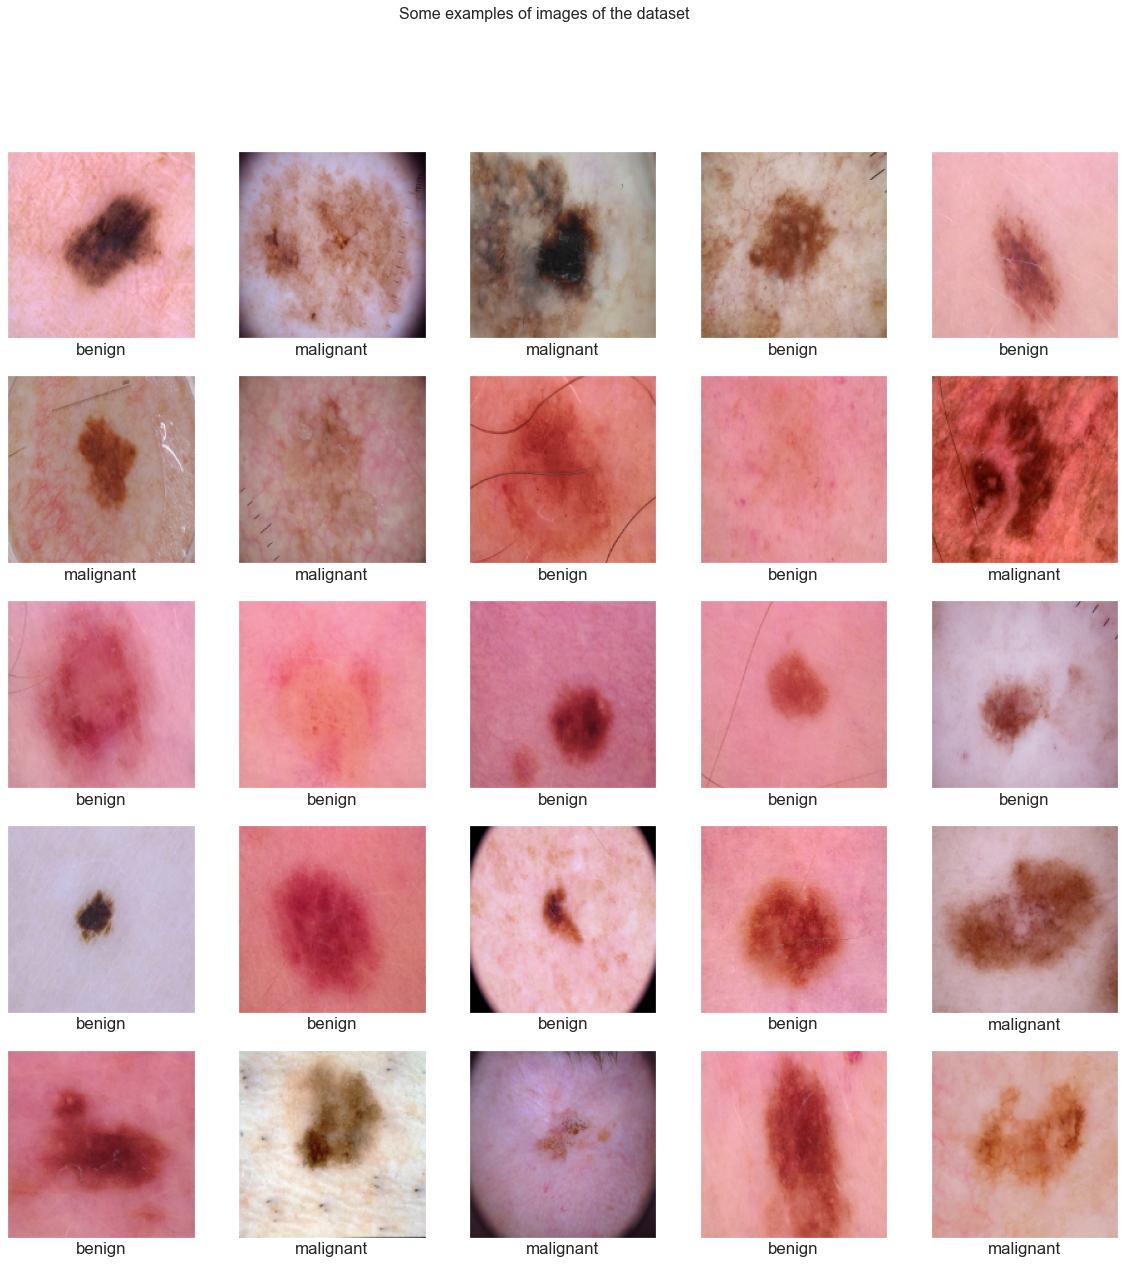

In [13]:
display_examples(class_names, train_images, train_labels)

In [14]:











model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [15]:

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=25, validation_split = 0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
print("Test accuracy: ", test_acc)
print("train accuracy: ", train_acc)
model.save("model.h5")



Train on 2109 samples, validate on 528 samples
Epoch 1/25
2109/2109 [==============================] - 6s 3ms/sample - loss: 0.1475 - accuracy: 0.9412 - val_loss: 0.4972 - val_accuracy: 0.8106
Epoch 2/25
2109/2109 [==============================] - 6s 3ms/sample - loss: 0.1261 - accuracy: 0.9507 - val_loss: 0.5158 - val_accuracy: 0.8182
Epoch 3/25
2109/2109 [==============================] - 6s 3ms/sample - loss: 0.1286 - accuracy: 0.9573 - val_loss: 0.5406 - val_accuracy: 0.7898
Epoch 4/25
2109/2109 [==============================] - 6s 3ms/sample - loss: 0.1339 - accuracy: 0.9483 - val_loss: 0.5201 - val_accuracy: 0.7879
Epoch 5/25
2109/2109 [==============================] - 13s 6ms/sample - loss: 0.1326 - accuracy: 0.9488 - val_loss: 0.5573 - val_accuracy: 0.7955
Epoch 6/25
2109/2109 [==============================] - 6s 3ms/sample - loss: 0.1040 - accuracy: 0.9649 - val_loss: 0.5308 - val_accuracy: 0.7992
Epoch 7/25
2109/2109 [==============================] - 6s 3ms/sample - loss

In [38]:
test_loss = model.evaluate(test_images, test_labels)

660/660 [==============================] - 1s 1ms/sample - loss: 0.7574 - accuracy: 0.8152


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

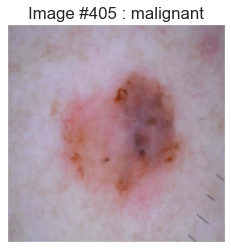

In [40]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [41]:
#, cmap=plt.cm.binary

In [42]:
def get_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return cv2.resize(img, (100,100))


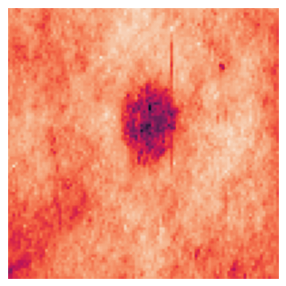

In [43]:
images = np.array([get_image('C:/Users/parit/Downloads/skin/test/benign/256.jpg')])
plt.figure(figsize=(5,5))
for i in range(1):
    plt.subplot(1,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i] )
    
plt.show()


In [44]:

model = tf.keras.models.load_model("model.h5")
preds = model.predict(test_images)

def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")

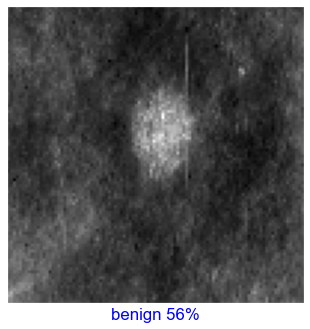

In [45]:
plt.figure(figsize=(12,12))
for i in range(1):
    # image
    plt.subplot(2,2,  2*i+1)
    plot_image(preds[i], images[i])
    # bar chart

plt.show()